### This will be used to understand how much variance there is in positions played between players over the seasons

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from UtilFunctions import format_season

In [4]:
dfs = {}
for season in range (1997, 2024):
    first_year, second_year = format_season(season)
    df = pd.read_csv(f'DataCollection/Player_Time_By_Position/player_time_by_position_{first_year}-{second_year}.csv')
    dfs[season] = df


In [7]:
def calculate_positional_entropy(row):
    """Calculates the entropy of a player's position distribution."""
    positions = ['PG%', 'SG%', 'SF%', 'PF%', 'C%']
    percentages = [row[pos] / 100 for pos in positions]  # Normalize to proportions
    return entropy(percentages)

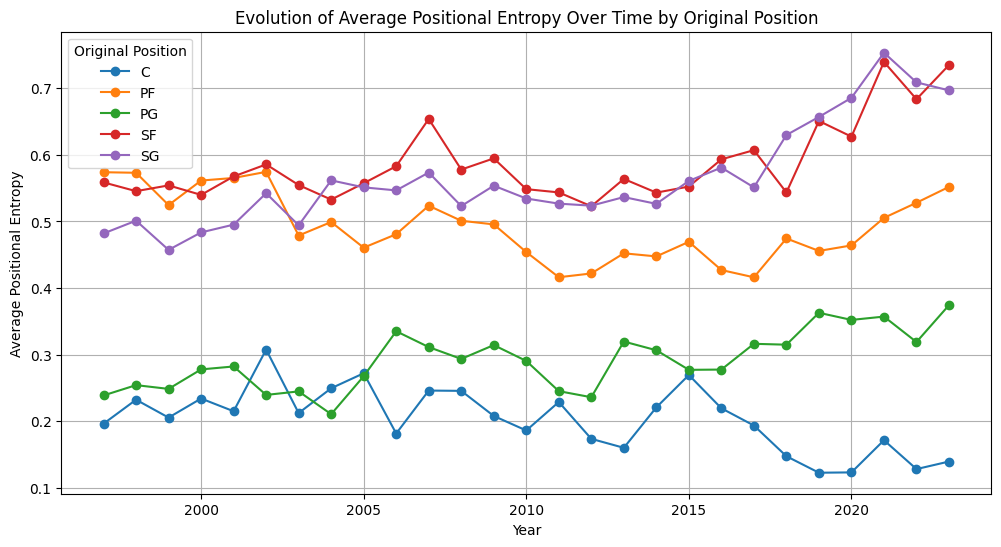

In [12]:
original_positions = {}
for year, df in dfs.items():
    for player in df['Player'].unique():
        if player not in original_positions:
            # Get the first position listed for the player
            original_positions[player] = df[df['Player'] == player]['Pos'].iloc[0]

# Calculate average positional entropy for each year, grouped by original position
yearly_entropy = {}
for year, df in dfs.items():
    df['PositionalEntropy'] = df.apply(calculate_positional_entropy, axis=1)
    df['OriginalPosition'] = df['Player'].map(original_positions)  # Map original position to each row
    grouped = df.groupby('OriginalPosition')['PositionalEntropy'].mean()
    yearly_entropy[year] = grouped

# Create a DataFrame from the yearly entropy data
entropy_df = pd.DataFrame(yearly_entropy)
entropy_df.index.name = 'Original Position'

# Plot the average positional entropy over time for each original position
plt.figure(figsize=(12, 6))
for position in entropy_df.index:
    plt.plot(entropy_df.columns, entropy_df.loc[position], marker='o', label=position)

plt.xlabel('Year')
plt.ylabel('Average Positional Entropy')
plt.title('Evolution of Average Positional Entropy Over Time by Original Position')
plt.grid(True)
plt.legend(title='Original Position')

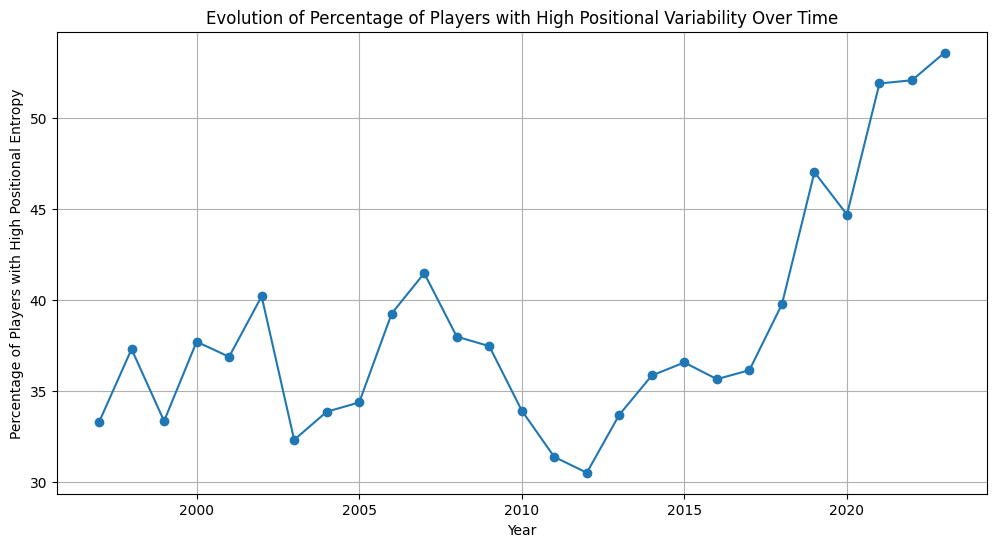

In [9]:
# Define a threshold for high positional variability
entropy_threshold = 0.6

# Calculate the percentage of players with high positional variability for each year
yearly_percentage = {}
for year, df in dfs.items():
    df['PositionalEntropy'] = df.apply(calculate_positional_entropy, axis=1)
    high_entropy_players = df[df['PositionalEntropy'] > entropy_threshold]
    percentage = (len(high_entropy_players) / len(df)) * 100
    yearly_percentage[year] = percentage

# Create a DataFrame from the yearly percentage data
percentage_df = pd.DataFrame.from_dict(yearly_percentage, orient='index', columns=['PercentageHighEntropy'])
percentage_df.index.name = 'Year'

# Plot the percentage of players with high positional variability over time
plt.figure(figsize=(12, 6))
plt.plot(percentage_df.index, percentage_df['PercentageHighEntropy'], marker='o')
plt.xlabel('Year')
plt.ylabel('Percentage of Players with High Positional Entropy')
plt.title('Evolution of Percentage of Players with High Positional Variability Over Time')
plt.grid(True)
plt.show()

C:\Users\mathe\AppData\Local\Temp\ipykernel_29824\3964973682.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(entropy_data, labels=comparison_years)


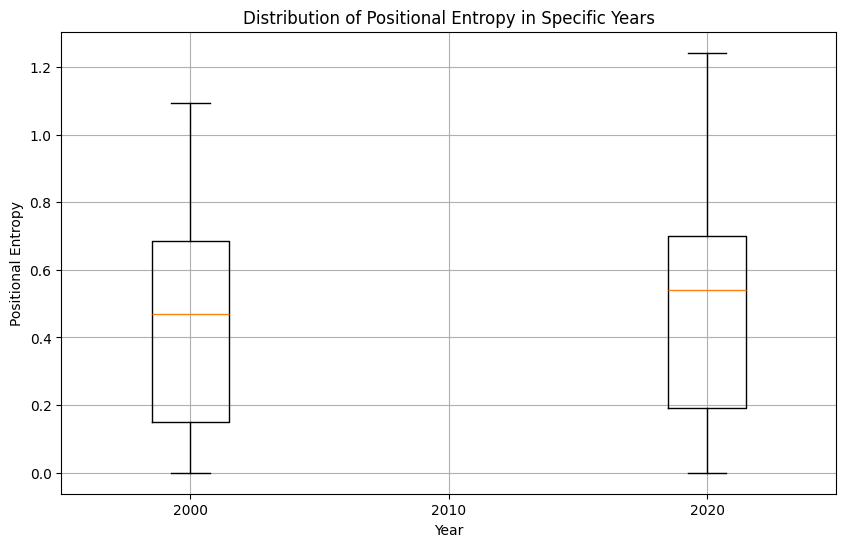

In [10]:
# Define the years to compare
comparison_years = [2000, 2010, 2020]

# Create a list to store the positional entropy data for each year
entropy_data = []
for year in comparison_years:
    df = dfs[year]
    df['PositionalEntropy'] = df.apply(calculate_positional_entropy, axis=1)
    entropy_data.append(df['PositionalEntropy'])

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(entropy_data, labels=comparison_years)
plt.xlabel('Year')
plt.ylabel('Positional Entropy')
plt.title('Distribution of Positional Entropy in Specific Years')
plt.grid(True)
plt.show()

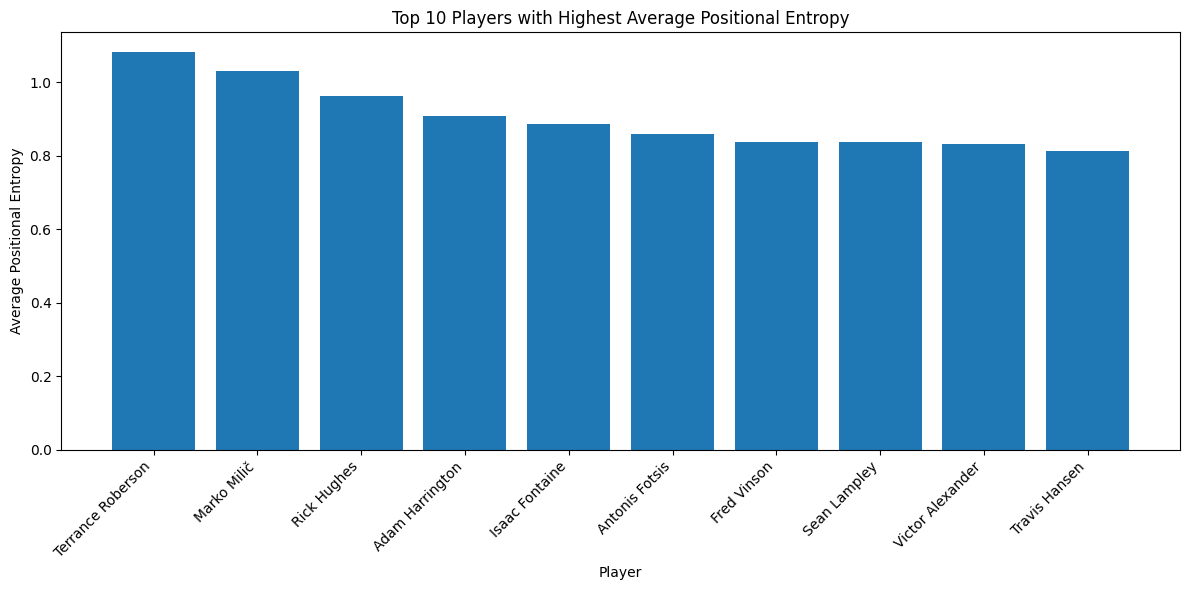

In [11]:
# Calculate the average positional entropy for each player across all seasons
player_entropy = {}
for year, df in dfs.items():
    df['PositionalEntropy'] = df.apply(calculate_positional_entropy, axis=1)
    for player in df['Player'].unique():
        if player not in player_entropy:
            player_entropy[player] = []
        player_data = df[df['Player'] == player]['PositionalEntropy']
        player_entropy[player].extend(player_data)

# Calculate the average positional entropy for each player
player_average_entropy = {player: np.mean(entropies) for player, entropies in player_entropy.items()}

# Sort the players by average positional entropy in descending order
sorted_players = sorted(player_average_entropy.items(), key=lambda x: x[1], reverse=True)

# Get the top N players
top_n = 10
top_players = sorted_players[:top_n]

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar([player for player, entropy in top_players], [entropy for player, entropy in top_players])
plt.xlabel('Player')
plt.ylabel('Average Positional Entropy')
plt.title(f'Top {top_n} Players with Highest Average Positional Entropy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()